In [97]:
# Extendido de:
# http://scikit-learn.org/dev/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py

In [98]:
COLAB = True


## Objetivo (usando PCA):
- Comprimir las imágenes:

    - Reducimos la cantidad de datos, trabajando con menos números por imagen, pero conservando las partes importantes.
- Eliminar ruido y redundancia:

    - Quitamos información que no ayuda al análisis, como el fondo negro o detalles pequeños que no son esenciales.
- Facilitar el análisis y visualización:

    - Transformamos las imágenes para trabajar con solo 2 o 3 números en lugar de 64, lo que nos permite graficar y comprender mejor los datos.







In [99]:
import numpy as np
import matplotlib.pyplot as plt   #generar gráficos y visualizaciones de datos.
from sklearn.datasets import load_digits  ## Cargamos el dataset de dígitos (datos de números escritos a mano).
from sklearn.decomposition import PCA   ## PCA (Análisis de Componentes Principales) es una técnica para reducir dimensiones capturando la mayor parte de la información.

### ¿Qué es load_digits?
- Es un dataset que contiene imágenes de dígitos escritos a mano. Cada imagen está representada como una matriz de píxeles de 8x8 (en total, 64 píxeles).


### ¿Qué es X y qué es y?

- x: Contiene los valores numéricos de cada píxel para todas las imágenes. Cada fila de X es una imagen y cada columna es un píxel.
- y: Contiene las etiquetas de las imágenes (el número que representa cada imagen: 0, 1, 2, ..., 9).


### ¿Qué es n_samples y n_features?

- n_samples: La cantidad de imágenes en el dataset.
- n_features: La cantidad de características por imagen, que son los valores de cada uno de los píxeles.  Cada imagen está representada como una cuadrícula de 8x8 píxeles. Si multiplicamos 8×8=64, obtenemos el total de atributos.

In [100]:
#digits = load_digits(n_class=6)
digits = load_digits()    # Cargamos el dataset de dígitos escritos a mano
X = digits.data   # X contiene los valores numéricos de los píxeles de cada imagen
y = digits.target  # y contiene la etiqueta de cada imagen (es decir, el número que representa: 0, 1, 2, etc.)
n_samples, n_features = X.shape
lado = int(np.sqrt(n_features))

print("núm. muestras       =", n_samples)   # Total de imágenes en el dataset. Hay 1797 imágenes diferentes en el dataset.
print("núm. atributos      =", n_features)  # Total de píxeles por imagen  . Cada imagen tiene 64 valores que corresponden a los píxeles (porque son imágenes de 8x8 píxeles).
print("dígitos             =", np.unique(y))  #Hay 10 clases distintas de números representados (del 0 al 9).
print("lado de cada imagen =", lado)   # Dimensiones de cada imagen (por ejemplo, 8x8 píxeles)

núm. muestras       = 1797
núm. atributos      = 64
dígitos             = [0 1 2 3 4 5 6 7 8 9]
lado de cada imagen = 8


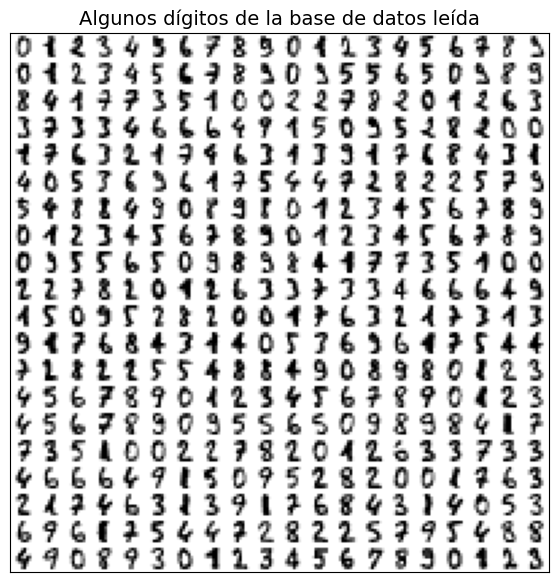

In [101]:
#----------------------------------------------------------------------
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + lado, iy:iy + lado] = X[i * n_img_per_row + j].reshape((lado, lado))

plt.figure(figsize=(7,7))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('Algunos dígitos de la base de datos leída', fontsize=14)
plt.show()

In [102]:
X.shape

(1797, 64)

In [103]:
y.shape

(1797,)

In [104]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

ejemplo 0 en X:


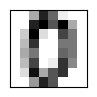

Como vector:

 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

puesto como matriz 8 x 8 :

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

El y de este ejemplo es 0


In [105]:
ejemplo = 0
print("ejemplo", ejemplo, "en X:")
plt.figure(figsize=(1,1))
plt.imshow(X[ejemplo].reshape((lado,lado)), cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('', fontsize=14)
plt.show()

print("Como vector:\n\n", X[0])
print("\npuesto como matriz", lado, "x", lado, ":\n")
print(X[0].reshape((lado,lado)))
print("\nEl y de este ejemplo es", y[ejemplo])

## Aplicamos PCA 

In [106]:
# Creamos un modelo PCA (Análisis de Componentes Principales)
# Estamos configurando el modelo para que reduzca los datos de cada imagen a 1 sola variable.
# Este número comprimido contendrá la mayor cantidad posible de información sobre la imagen.
# n_components=1 indica que queremos reducir las 64 variables (píxeles) de cada imagen a 1 sola variable.
pca = PCA(n_components=1)

# Ajustamos el modelo PCA a los datos (X)
# PCA analiza las imágenes y calcula cuál es la dirección que tiene la mayor variabilidad (información importante).
#Detecta cuál es la combinación de píxeles que tiene más información.
pca.fit(X)


# Comprimimos los datos originales
# En este paso, transformamos las imágenes originales de 64 valores a 1 solo valor por imagen. Comprimimos las imágenes
# Cada una de las imágenes originales, que tenía 64 valores (píxeles), ahora se representa con 1 solo valor.
datos_comprimidos = pca.transform(X)   

In [107]:
datos_comprimidos.shape  # las 1797 imágenes solo tienen 1 variable desspués de comprimir

(1797, 1)

### ¿ Cómo de buena o mala es esta transformación?

 #### Descomprimir. Reconstruimos los datos originales a partir de los datos comprimidos

In [108]:
## El método inverse_transform "descomprime" los datos.  Reconstruie las imágenes originales a partir de la información comprimida.
datos_descomprimidos = pca.inverse_transform(datos_comprimidos)


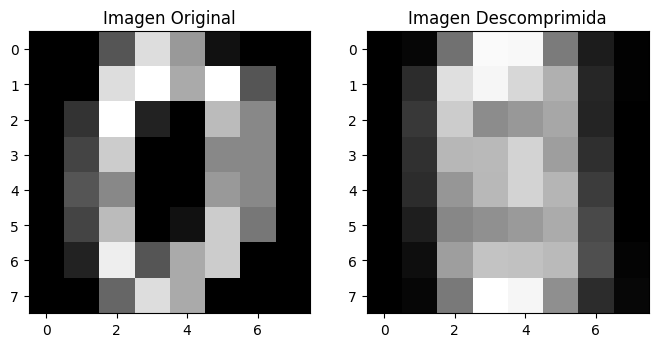

In [109]:
# Mostramos una imagen original y su versión descomprimida
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(X[0].reshape(8, 8), cmap='gray')
plt.title("Imagen Original")

# Imagen descomprimida
plt.subplot(1, 2, 2)
plt.imshow(datos_descomprimidos[0].reshape(8, 8), cmap='gray')
plt.title("Imagen Descomprimida")

plt.show()


In [110]:
datos_descomprimidos.shape   #volvemos a recuperar las 64 variables

(1797, 64)

#### Comparamos el original con la imagen descomprimida
El código calcula el Error Cuadrático Medio (MSE, por sus siglas en inglés) entre los datos originales (X) y los datos descomprimidos (datos_descomprimidos).

### ¿Qué representa este error?
Mide cuánta información se perdió al descomprimir los datos.

Este cálculo mide la diferencia promedio entre cada valor original (los píxeles de X) y su versión descomprimida (datos_descomprimidos).

Si el error es pequeño, significa que las imágenes descomprimidas son muy parecidas a las originales.

Si el error es grande, significa que la compresión ha perdido demasiada información.


In [111]:
error = ((X - datos_descomprimidos) ** 2).mean()
print("Error cuadrático medio con 1 componente:", error)

Error cuadrático medio con 1 componente: 15.977678462234499


¿ Cuál es la varianza de los datos originales?

In [112]:
X.var()  #La varianza es una medida de la variabilidad o información contenida en los datos.  la cantidad total de información disponible en las imágenes originales

np.float64(36.20173240585726)

In [113]:
# Aquí estamos calculando la cantidad de varianza (información) que logramos conservar después de comprimir y descomprimir las imágenes.

# El siguiente código calcula cuánta información de los datos originales se conserva después de aplicar PCA y descomprimirlos
#  la información original menos la información perdida.
X.var()  - (((X- datos_descomprimidos)**2).mean())  

np.float64(20.224053943622756)

#### Cuántas más componentes ponga , comprimiré menos 

- Más componentes principales = menor error (mejor reconstrucción).

- Menos componentes principales = mayor error (menos detalles en la reconstrucción).

In [114]:
componentes =2

In [115]:
pca = PCA(n_components=componentes)
pca.fit(X)
datos_comprimidos = pca.transform(X) 
datos_descomprimidos = pca.inverse_transform(datos_comprimidos)


In [116]:
error = ((X - datos_descomprimidos) ** 2).mean()
print(f"Error cuadrático medio con {componentes} componentes:", error)

Error cuadrático medio con 2 componentes: 13.421012200761451


In [117]:

X.var()  - (((X- datos_descomprimidos)**2).mean())

np.float64(22.780720205095804)

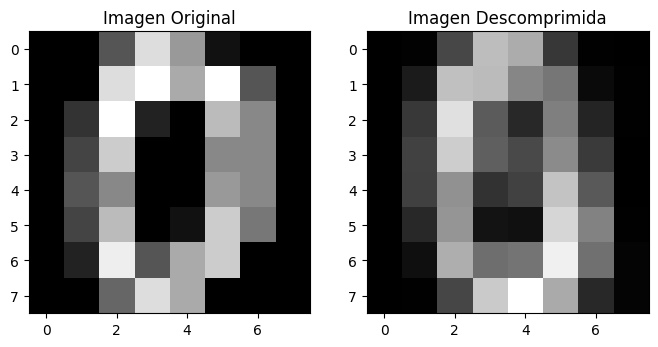

In [118]:
# Mostramos una imagen original y su versión descomprimida
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

# Imagen original
plt.subplot(1,2, 1)
plt.imshow(X[0].reshape(8, 8), cmap='gray')
plt.title("Imagen Original")

# Imagen descomprimida
plt.subplot(1, 2, 2)
plt.imshow(datos_descomprimidos[0].reshape(8, 8), cmap='gray')
plt.title("Imagen Descomprimida")

plt.show()


In [119]:
componentes =3

In [120]:
pca = PCA(n_components=componentes)
pca.fit(X)

# Varianza de las 3 variables nuevas (cantidad de información que mantengo de la original)
# La primera componente (PCA1) explica más información que las otras porque captura la mayor información de los datos.
print(pca.explained_variance_, pca.explained_variance_.sum())

[179.0069301  163.71774688 141.78843909] 484.51311607193327


In [121]:
#Cada valor representa cuánta información (variabilidad) de los datos originales está capturando cada componente principal.
pca.explained_variance_

array([179.0069301 , 163.71774688, 141.78843909])

In [122]:
#Nos dice la cantidad total de información que hemos mantenido al reducir los datos originales (de 64 variables) a solo 3.
pca.explained_variance_.sum()

np.float64(484.51311607193327)

In [123]:
# Varianza total de las 64 variables originales (cantidad de información original)
X.var(axis=0).sum()

np.float64(1201.4787373626168)

In [124]:
# el porcentaje de información original que se ha capturado 
#Un porcentaje bajo (como 40%) indica que hemos comprimido mucho, pero también hemos perdido detalles de los datos.
(pca.explained_variance_.sum()/ X.var(axis=0).sum())*100   

np.float64(40.32639954457246)

In [125]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [126]:
# Comprimimos los datos originales
X_nuevas = pca.transform(X)
X_nuevas[0]

array([ -1.25946645, -21.27488348,   9.46305462])

In [127]:
X.shape

(1797, 64)

In [128]:
X_nuevas.shape

(1797, 3)

ejemplo 200 en X:


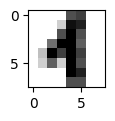

In [129]:
ejemplo = 200
print("ejemplo", ejemplo, "en X:")
plt.figure(figsize=(1,1))
plt.imshow(X[ejemplo].reshape((lado,lado)), cmap=plt.cm.binary);

[[ 7.2077319   9.86510963 13.93678278]]


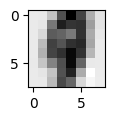

In [130]:
pca2 = PCA(n_components=3)
pca2.fit(X)

print(pca2.transform(X[ejemplo:(ejemplo+1)]))
descompr = pca2.inverse_transform(pca2.transform(X[ejemplo:(ejemplo+1)]))
plt.figure(figsize=(1,1))
plt.imshow(descompr[0].reshape((lado,lado)), cmap=plt.cm.binary);